The coding environment used for this task was through Google Colab due to the fact that the service provides a multitude of high end computing resources that are not available to me locally through my computer.

# Downloading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive') # To mounting Google Drive to import specific files for use

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle # Creating a new folder named Kaggle

In [3]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
# Importing kaggle.json which is the Kaggle API Token
# Used so that Google Colab can directly connect and download from Kaggle

In [4]:
! chmod 600 ~/.kaggle/kaggle.json
# Setting the permissions for kaggle.json
# To give only the owner full read and write access to the file

The dataset used for this task is from Kaggle. It is named "Self-Driving Cars" and is accessible through this link: https://www.kaggle.com/datasets/alincijov/self-driving-cars

The dataset contains thousands of images, captured through a car's front camera, and 3 csv files. The csv files include data for training, validation and a combination of the previous two files respectively. Each row in the csv files is related to an object that has been tagged in the specific image, along with their class/object type and bounding box information in pixels. These files are useful for model training purposes which were explored further.

In [5]:
! kaggle datasets download alincijov/self-driving-cars # Downloading Kaggle dataset

Dataset URL: https://www.kaggle.com/datasets/alincijov/self-driving-cars
License(s): CC0-1.0
 99% 881M/892M [00:11<00:00, 156MB/s]
100% 892M/892M [00:11<00:00, 84.1MB/s]


In [6]:
! unzip self-driving-cars.zip # Unzipping the zip file

Streaming output truncated to the last 5000 lines.
  inflating: images/1479502279230178611.jpg  
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: images/147950229

# Importing necessary libraries

In [7]:
import numpy as np # NumPy: A library for numerical computations
import pandas as pd # pandas: A library used for data manipulation and analysis

from sklearn.utils import shuffle # A function to randomly order rows in a dataframe

import matplotlib.pyplot as plt # Matplotlib: A library used to create plots and visualizations
from matplotlib.patches import Rectangle # A function from Matplotlib to create a rectangular box around an object

from PIL import Image # A function to edit Images

import os # A library that will be used to manipulate files

import warnings # A library of python warnings
warnings.simplefilter("ignore") # A setting to have simple warnings be ignored

# Exploratory Data Analysis

In [8]:
df = pd.read_csv("labels_trainval.csv") # Creating a pandas dataset of all the objects tagged
df.head() # Shows first 5 rows of the dataframe
# It can be seen that all of the objects are grouped with other objects in the same image

frame  xmin  xmax  ymin  ymax  class_id
0  1478019952686311006.jpg   237   251   143   155         1
1  1478019952686311006.jpg   437   454   120   186         3
2  1478019953180167674.jpg   218   231   146   158         1
3  1478019953689774621.jpg   171   182   141   154         2
4  1478019953689774621.jpg   179   191   144   155         1

In [9]:
df = shuffle(df) # Randomly order rows in the dataframe
df.head()
# This was done so that a more varied analysis can be done as the same image will not be viewed multiple times

frame  xmin  xmax  ymin  ymax  class_id
55684   1478898302317310039.jpg   371   440   143   165         1
73560   1478899661415180271.jpg   106   141   149   189         1
140482  1479504187337515520.jpg   369   479   122   217         1
17899   1478732166112903425.jpg   183   190   113   121         5
67872   1478899352348558379.jpg   271   278   119   135         5

In [10]:
# Showing the dimensions of the object dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
# There are 165,105 objects tagged in this dataset

Number of rows: 165105
Number of columns: 6


In [11]:
# Counting the number of images in the dataset
base_path = r"/content/images/" # Path to the images directory
print("Number of Images:", len([image for image in os.listdir(base_path) if os.path.isfile(os.path.join(base_path, image))]))
# Counts all files in the directory
# There are a total of 22,241 images in this dataset

Number of Images: 22241


In [12]:
classes = df.class_id.unique() # To see all of the classes of objects in the dataset
print(classes)
# There are 5 objects tagged in the dataset

[1 5 2 3 4]


In [13]:
labels = {1:"Car", 2:"Truck", 3:"Person", 4:"Bicycle", 5:"Traffic Light"}
# A dictionary used to link the class_id to their corresponding names

In [14]:
imagesURL = [] # To hold the path to images
images = {} # To hold the image variables from the imported images
boxes = {} # To hold bounding box location to the objects

base_path = "/content/images/" # Path to the images directory

for class_id in classes: # To get one image for each class
  first = df[df["class_id"] == class_id].iloc[0] # Gets the first instance of that class from the dataframe

  imagesURL.append(base_path + first["frame"]) # Gets the path to the image
  images[class_id] = plt.imread(base_path + first["frame"]) # Import the image into python
  boxes[class_id] = [first["xmin"], first["xmax"], first["ymin"], first["ymax"]]
  # Store the bounding box of the images

  # To measure the dimensions of the images for preparation
  im = Image.open(base_path + first['frame']) # Importing the image
  w = int(im.size[0]) # Getting the width (pixels)
  h = int(im.size[1]) # Getting the height (pixels)
  print(f"{labels[class_id]} Image: Width: {w}, Height: {h}") # Printing sizes
  # All of the images in the dataset has the same dimensions as they are all taken in front of a car
  # Thanks to this, no preprocessing is needed as they do not need resizing for input

Car Image: Width: 480, Height: 300
Traffic Light Image: Width: 480, Height: 300
Truck Image: Width: 480, Height: 300
Person Image: Width: 480, Height: 300
Bicycle Image: Width: 480, Height: 300


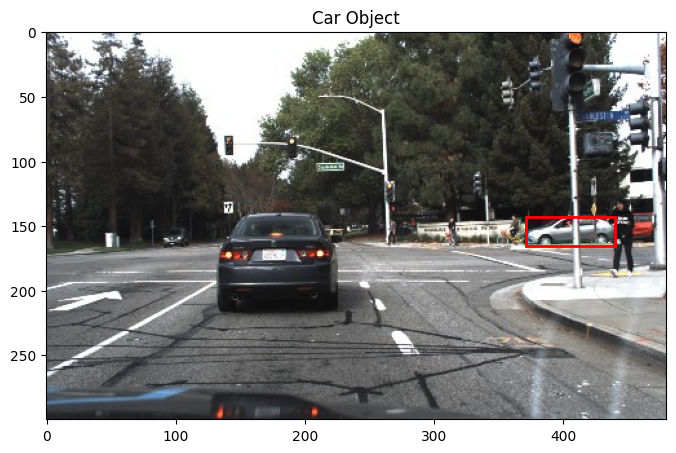

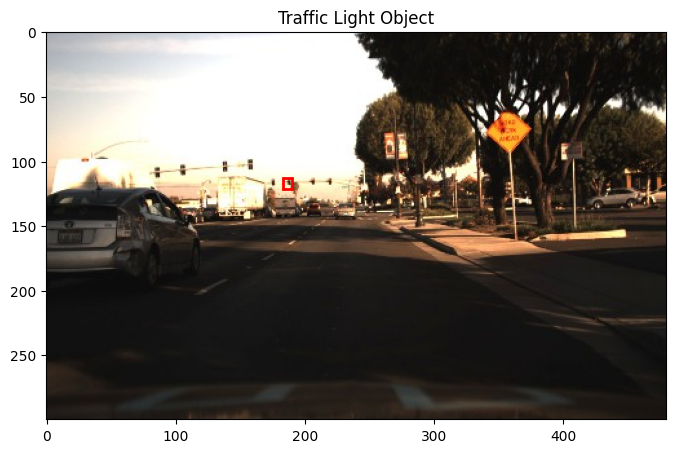

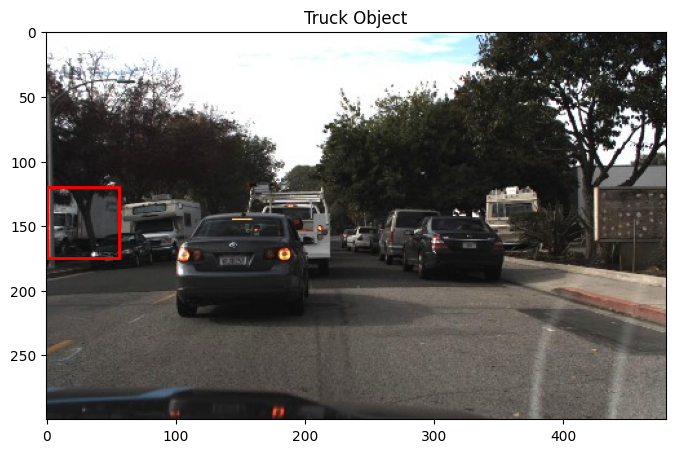

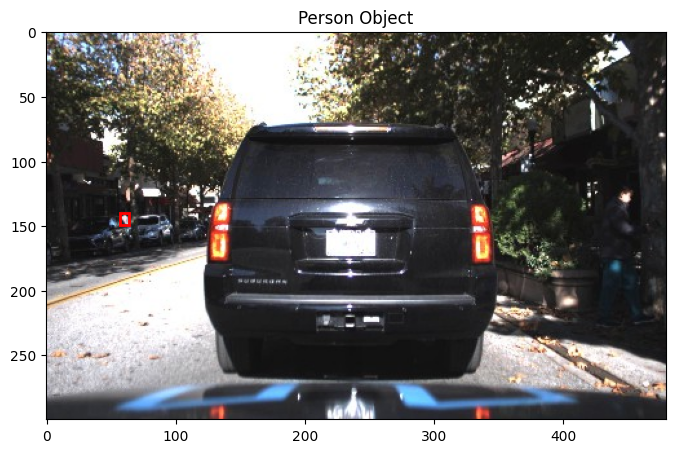

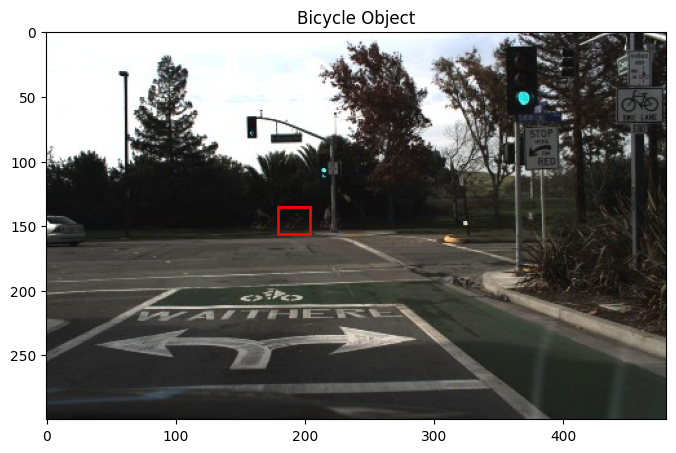

In [15]:
for i in classes: # To view the images and objects with their bounding boxes seen previously
  xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]
  # Retrieves the bounding box location

  plt.figure(figsize=(8, 10)) # Viewed through matplotlib plots
  plt.title(labels[i] + " Object") # Titling the plot
  plt.imshow(images[i]) # Showing the image in the plot
  plt.gca().add_patch(plt.Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), color = "red", fill = False, linewidth = 2))
  # To add the bounding box using a Rectangle in red

  plt.show() # Show the plot

All of the bounding boxes are around the correct class/object which can be used for model training purposes.

The dataset has been analyzed and there is no need for preprocessing as all of the images are in the same size.

# Pre-Trained Model

In [16]:
! pip install ultralytics # Installing the Ultralytics library for YOLO functionalities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [17]:
from ultralytics import YOLO # A library holding all of the data regarding the yolo models and functionalities

In [18]:
df[df["frame"] == "1478898191487349207.jpg"]
# Shows all of the tagged objects in a specified image used for model testing

frame  xmin  xmax  ymin  ymax  class_id
54184  1478898191487349207.jpg   100   111   145   184         3
54193  1478898191487349207.jpg   235   249   147   182         3
54195  1478898191487349207.jpg   273   321   140   162         1
54181  1478898191487349207.jpg    79    93   145   174         3
54182  1478898191487349207.jpg    85    97   143   168         3
54185  1478898191487349207.jpg   101   113   147   183         1
54187  1478898191487349207.jpg   130   143   146   167         4
54183  1478898191487349207.jpg    90   109   148   188         3
54191  1478898191487349207.jpg   156   209   147   167         1
54199  1478898191487349207.jpg   432   458   109   246         3
54188  1478898191487349207.jpg   132   141   147   164         4
54196  1478898191487349207.jpg   292   342   139   162         1
54186  1478898191487349207.jpg   127   140   147   165         4
54198  1478898191487349207.jpg   398   472   102   282         3
54197  1478898191487349207.jpg   317   342   137   160         1
54189  1478898191487349207.jpg   132   141   147   165         3
54192  1478898191487349207.jpg   234   303   140   167         1
54194  1478898191487349207.jpg   253   269   139   182         3
54190  1478898191487349207.jpg   155   209   146   167         1

In [19]:
model = YOLO("yolov8s.pt") # For the pre-trained model, the YOLOv8s is used

100%|██████████| 21.5M/21.5M [00:00<00:00, 146MB/s]


In [20]:
results = model.predict(source="/content/images/1478898191487349207.jpg", save=True, conf=0.2, iou=0.5)
# Using the model to predict and detect objects in a specified image
# The image was chosen as it contains a large number of visible objects


image 1/1 /content/images/1478898191487349207.jpg: 416x640 10 persons, 5 cars, 2099.2ms
Speed: 30.2ms preprocess, 2099.2ms inference, 36.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [21]:
result = results[0] # Contains the information for all of the objects detected
box = result.boxes[0] # Contains the bounding boxes of all the objects

In [22]:
for box in result.boxes: # Loops over each object detected
  class_id = result.names[box.cls[0].item()] # Gets the class/object type for that object
  cords = box.xyxy[0].tolist() # Gets the bounding box location for the object
  cords = [round(x) for x in cords] # Rounding the coordinate points to a specific pixel
  conf = round(box.conf[0].item(), 2) # Confidence of the model in assuming that an object is to the correct class

  # Printing results for all objects
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: person
Coordinates: [396, 103, 480, 284]
Probability: 0.92
---
Object type: car
Coordinates: [159, 149, 209, 166]
Probability: 0.84
---
Object type: person
Coordinates: [446, 97, 480, 259]
Probability: 0.78
---
Object type: person
Coordinates: [235, 147, 249, 183]
Probability: 0.75
---
Object type: person
Coordinates: [80, 144, 94, 174]
Probability: 0.73
---
Object type: person
Coordinates: [255, 141, 269, 180]
Probability: 0.72
---
Object type: car
Coordinates: [235, 140, 302, 163]
Probability: 0.7
---
Object type: person
Coordinates: [93, 150, 108, 183]
Probability: 0.59
---
Object type: car
Coordinates: [293, 140, 332, 161]
Probability: 0.55
---
Object type: person
Coordinates: [133, 146, 141, 167]
Probability: 0.51
---
Object type: person
Coordinates: [146, 149, 152, 166]
Probability: 0.41
---
Object type: person
Coordinates: [104, 150, 112, 182]
Probability: 0.39
---
Object type: car
Coordinates: [282, 140, 317, 162]
Probability: 0.32
---
Object type: car
Coordinates:

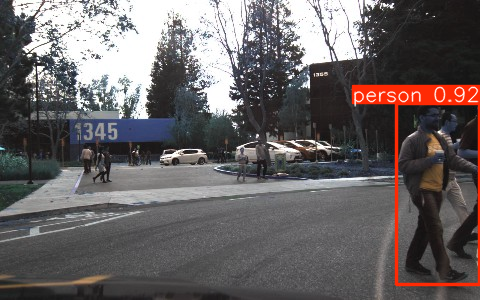

In [23]:
plot = result[0].plot()
display(Image.fromarray(plot)) # Visualizing the objects in the image
# It can be seen that the model has a relatively high accuracy as it surrounded a lot of the objects in the image
# However the model missed a number of objects and their types when compared to the tagged objects for this image


image 1/1 /content/images/1478898302317310039.jpg: 416x640 3 persons, 5 cars, 8 traffic lights, 2139.0ms
Speed: 3.2ms preprocess, 2139.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


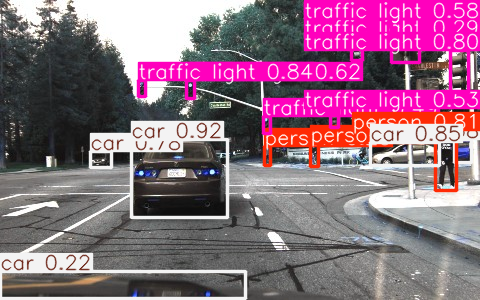


image 1/1 /content/images/1478732166112903425.jpg: 416x640 6 cars, 1 truck, 4 traffic lights, 1 kite, 1996.5ms
Speed: 18.5ms preprocess, 1996.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


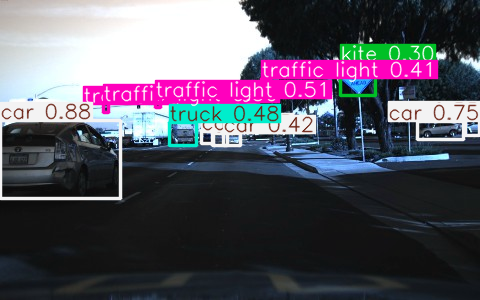


image 1/1 /content/images/1478897393966252368.jpg: 416x640 1 person, 7 cars, 1 bus, 2 trucks, 1246.6ms
Speed: 12.8ms preprocess, 1246.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


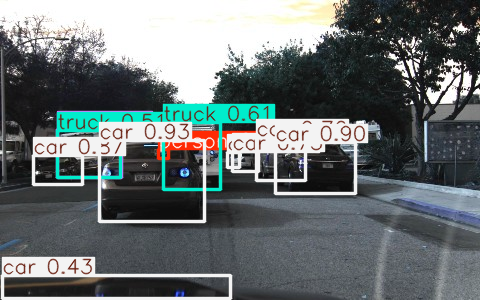


image 1/1 /content/images/1479504639388433348.jpg: 416x640 1 person, 3 cars, 1 motorcycle, 1 potted plant, 965.6ms
Speed: 3.5ms preprocess, 965.6ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


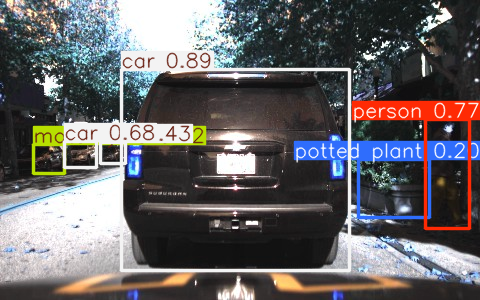


image 1/1 /content/images/1478898679368439814.jpg: 416x640 1 car, 3 traffic lights, 968.0ms
Speed: 5.2ms preprocess, 968.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


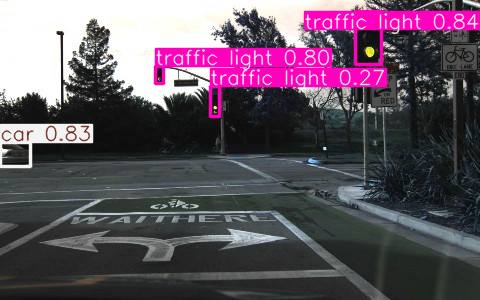

In [24]:
for image in imagesURL: # Further testing with the model using an image that has a unique object in each
  trainedResults = model.predict(source=image, save=True, conf=0.2, iou=0.5)

  plot = trainedResults[0].plot()
  display(Image.fromarray(plot))

Although the pre-trained model is able to accurately detect objects in the image, it is not perfect. Additionally, the model also detects object that are not tagged from the Kaggle dataset. Due to these aspects, a custom model can be made just for the tagged objects as seen below, however issues had arised.

#  Custom Model with Training

In [25]:
! mkdir data # Creating a folder named data

In [26]:
! mkdir data/images # Creating a folder named images in the new data folder to hold the training data
! mkdir data/labels # Creating a folder named labels in the new data folder to hold the labels for all objects in the images

In [27]:
df = pd.read_csv("labels_trainval.csv") # Resets the order of the images for training

In [28]:
# Due to the bounding boxes in the dataset are different to the bounding boxes information used for YOLO,
# The data needs to be converted
# This is because the dataset provides pixel locations while YOLO needs ratios to the image

# Additionally for each Image a txt file in the labels folder with the same name
# This file contains the class/type of the object and their bounding box data in the image

def convert(size, box): # Function for pixel conversion
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

base_path = "/content/images/"

uniqueImages = set() # A set to check which image will be used for training

for i in range(df.shape[0]): # Looping through all rows in the dataframe
  im = Image.open(base_path + df["frame"].iloc[i]) # Imports the image
  w = int(im.size[0]) # Gets the image width (pixels)
  h = int(im.size[1]) # Gets the image height (pixels)

  uniqueImages.add(base_path + df["frame"].iloc[i]) # Adds the image to set if it is unique

  if (len(uniqueImages) > 100): # Limits the number of training images to only 100
    break

  box = (df["xmin"].iloc[i], df["xmax"].iloc[i], df["ymin"].iloc[i], df["ymax"].iloc[i])
  # Retrieves the bounding box location of the object in the dataset
  borderBox = convert((w, h), box) # Converts the data for YOLO to understand

  classLabel = df["class_id"].iloc[i] - 1 # Converts the class id for YOLO

  fName = "/content/data/labels/" + df["frame"].iloc[i].split(".")[0] + ".txt"
  # Get the the name and location of the new txt files for each image

  txtfile = os.path.isfile(fName) # Boolean to check if the txt file exists

  f = open(fName, "a") # Opens the txt file for appending it

  if not txtfile: # Adds the data of a specific object for each image into the corresponding txt file
    f.write(f"{classLabel} {borderBox[0]} {borderBox[1]} {borderBox[2]} {borderBox[3]}")
  else:
    f.write(f"\n{classLabel} {borderBox[0]} {borderBox[1]} {borderBox[2]} {borderBox[3]}")

  f.close() # Closes the txt file

In [29]:
import shutil # A libray for manipulating files

for img in uniqueImages: # For all of the 100 images used previously, the image is dulpicated to the data folder for YOLO
  original = img # Original image path
  target = r"/content/data/images" # Destination image directory

  shutil.copy(original, target) # Copy function to dupplicate the image file

In [30]:
! cp /content/drive/MyDrive/custom.yaml /content # Importing the yaml file named custom.yaml that YOLO needs for training

The data in custom.yaml. It holds the path to the data directory and to the images folder in the data folder. Additionally, it holds the class names to the tagged objects.
```
path: /content/data # Dataset root dir
train: images # Images for training (relative to the path)
val: images # Images for testing/validation (relative to the path)

# Classes
names:
  0: Car
  1: Truck
  2: Person
  3: Bicycle
  4: Traffic Light
```

In [31]:
trainModel = YOLO("yolov8s.yaml")
# The base model used is the YOLOv8s model
# so that it can be compared to the previous pre-trained model
results = trainModel.train(data = "custom.yaml", model = "yolov8s.pt", epochs = 2, lr0 = 0.01)

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=custom.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 15.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/data/labels... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 1848.02it/s]

train: New cache created: /content/data/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G       5.09      8.637       4.21         96        640: 100%|██████████| 7/7 [05:40<00:00, 48.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:03<00:00, 15.79s/it]

                   all        101        614          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      5.081      8.067      4.227         24        640: 100%|██████████| 7/7 [05:04<00:00, 43.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<00:00, 14.22s/it]

                   all        101        614          0          0          0          0



2 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:04<00:00, 16.18s/it]

                   all        101        614          0          0          0          0


Speed: 1.9ms preprocess, 607.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


The model based on YOLOv8s had a training time of 10 minutes with only 100 images and an epochs of 2. The lengthly training time may have been due to the size of the images or inefficient parameters causing the RAM usage to sky rocket.

In [32]:
customUrl = r"/content/runs/detect/train/weights/best.pt" # Using the best weights for the model
customModel = YOLO(customUrl)
customResults = customModel.predict(source="/content/images/1478898191487349207.jpg", save=True, conf=0.2, iou=0.5)
# Using the model to predict and detect objects in a specified image
# The image was chosen as it contains a large number of visible objects


image 1/1 /content/images/1478898191487349207.jpg: 416x640 (no detections), 485.3ms
Speed: 4.0ms preprocess, 485.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


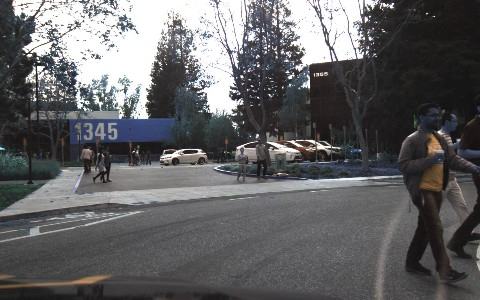

In [33]:
plot = customResults[0].plot()
display(Image.fromarray(plot))


image 1/1 /content/images/1478898302317310039.jpg: 416x640 (no detections), 482.2ms
Speed: 4.1ms preprocess, 482.2ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


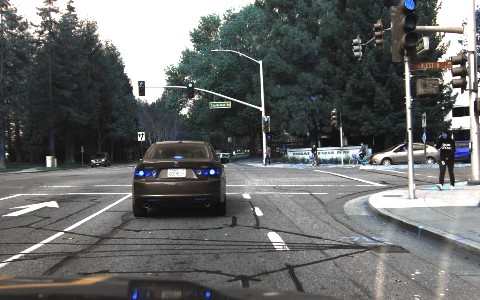


image 1/1 /content/images/1478732166112903425.jpg: 416x640 (no detections), 527.2ms
Speed: 4.4ms preprocess, 527.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


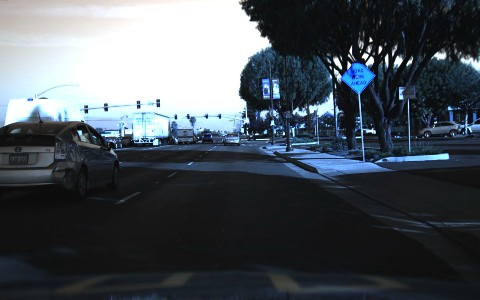


image 1/1 /content/images/1478897393966252368.jpg: 416x640 (no detections), 451.7ms
Speed: 5.2ms preprocess, 451.7ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


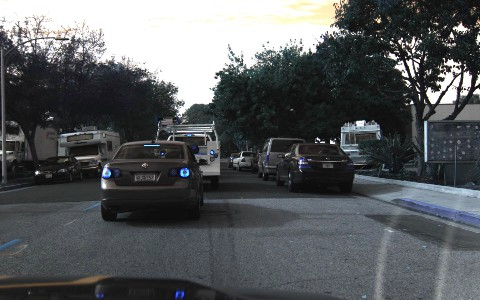


image 1/1 /content/images/1479504639388433348.jpg: 416x640 (no detections), 603.5ms
Speed: 3.6ms preprocess, 603.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


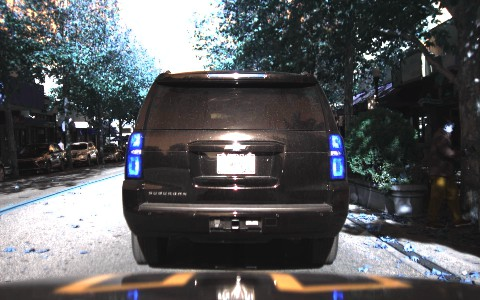


image 1/1 /content/images/1478898679368439814.jpg: 416x640 (no detections), 495.7ms
Speed: 5.2ms preprocess, 495.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


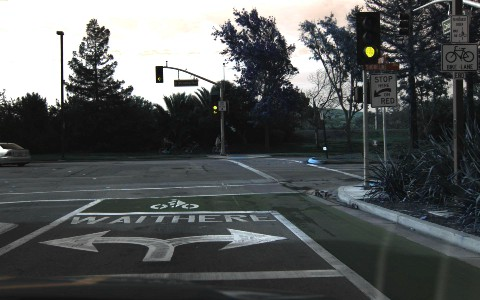

In [34]:
for image in imagesURL: # Further testing with the model using an image that has a unique object in each
  customResults = customModel.predict(source=image, save=True, conf=0.2, iou=0.5)

  plot = customResults[0].plot()
  display(Image.fromarray(plot))

The current custom YOLO model is very inaccurate as no objects were detected in any of the images that was fed to it. Because of this, the custom model will not be used for the detecting and cropping of objects. Instead the YOLOv8s pre-trained model will be utilized. Doing this makes the tagged objects from the dataset useless as they will not be used for this task.

# Object Cropping

In [35]:
! mkdir output # Creating a output folder that will contain the cropped pictures

In [36]:
model = YOLO("yolov8s.pt") # The pre-trained model used

In [37]:
output_path = "/content/output/" # Path to the output folder
image_dir = "/content/images" # Path to the image folder containing all of the images

for idx, filename in enumerate(os.listdir(image_dir)): # Looping over all image files and also getting their indexes
  if (idx > 2000): # Limits the images to 2000 due the length of time it would take to process the total of 22,241
    break

  fileURL = os.path.join(image_dir, filename) # Get the path to the specific image file
  im = Image.open(fileURL) # Importing file into python

  results = model.predict(source=fileURL, save=True, conf=0.2, iou=0.5)
  # Using the model to detect objects in the image

  result = results[0] # Retrieving the object data such as their class and bounding box location in the image
  box = '' # Instancing the bounding box

  try:
    # Sometimes the model does not detect any objects, hence to not make errors,
    # the bounding boxes are only retrieve when there are objects in the image
    box = result.boxes[0] # Getting the bounding boxes of all objects in the image
  except:
    continue # Continue from this specific iteration if there are no objects detected

  imageNum = 0 # Object index in that image

  for box in result.boxes: # Loops over all objects in the image
    class_id = result.names[box.cls[0].item()] # Gets the class/object type of the object
    cords = box.xyxy[0].tolist() # Gets the coordinates of the bounding box
    cords = [round(x) for x in cords] # Rounds the coordinates to specific pixels

    # Setting the coordinates of the bounding box to variables for use
    left = cords[0]
    top = cords[1]
    right = cords[2]
    bottom = cords[3]

    im1 = im.crop((left, top, right, bottom))
    # Create a new image of the object that is the crop of the original image

    imageNum += 1 # Add one to the index of the objects in the image
    file_path = f"{output_path}{class_id}/crop_{imageNum}_{class_id}_" + filename
    # Sets the name and file path of the cropped image and the class directory
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # If the directory does not exist, it will be created

    im1.save(file_path)
    # The cropped image of the object is now saved to the output path
    # The image is also saved to the specific class/object type

Streaming output truncated to the last 5000 lines.

image 1/1 /content/images/1479505136422416983.jpg: 416x640 7 cars, 1 fire hydrant, 466.5ms
Speed: 4.5ms preprocess, 466.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict3

image 1/1 /content/images/1478899905357181847.jpg: 416x640 15 cars, 473.2ms
Speed: 4.5ms preprocess, 473.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict3

image 1/1 /content/images/1479503967343257907.jpg: 416x640 8 cars, 1 truck, 424.7ms
Speed: 3.6ms preprocess, 424.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict3

image 1/1 /content/images/1479501668675476461.jpg: 416x640 2 cars, 1 truck, 2 traffic lights, 452.6ms
Speed: 3.8ms preprocess, 452.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict3

image 1/1 /content/images/1479501757196511447.j

In [38]:
# Calculating the total number of cropped images
count = 0 # Count of the files
for root_dir, cur_dir, files in os.walk(r'/content/output'): # A loop that counts all of the files in the output directory
  count += len(files)
print('file count:', count)

file count: 16307
